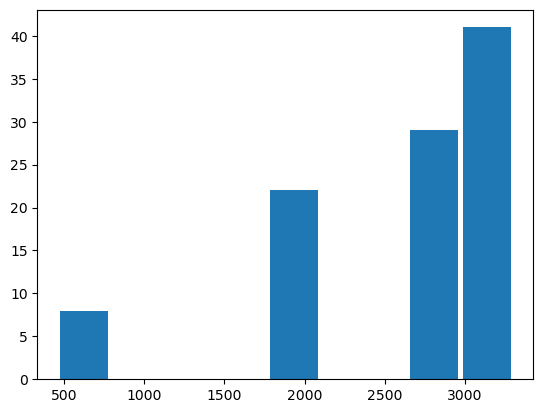

In [19]:
#problem1 
import random
from itertools import groupby
import matplotlib.pyplot as plt


fitness = [625, 1936, 2809, 3136]
runningtotal = fitness.copy()

sum = runningtotal[0]
for i in range(1,len(runningtotal)):
    sum += runningtotal[i]
    runningtotal[i] = sum

def randomNtimes(iteration,runningtotal,fitness):
    res = []
    for i in range(iteration):
        
        roulette_val = random.random() * runningtotal[len(runningtotal)-1]
    
        for i in  range(len(runningtotal)):
            if roulette_val <= runningtotal[i]:
                res.append(fitness[i])
                break
            
    return res


res = randomNtimes(100, runningtotal, fitness)
        
freq = [len(list(group)) for key, group in groupby(sorted(res)) ]


plt.bar(fitness, freq, 300)
       

plt.show()
      




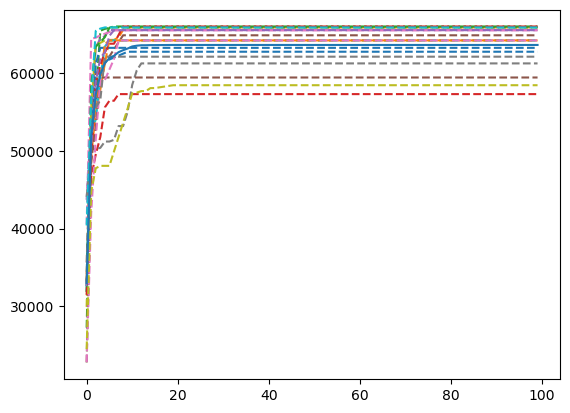

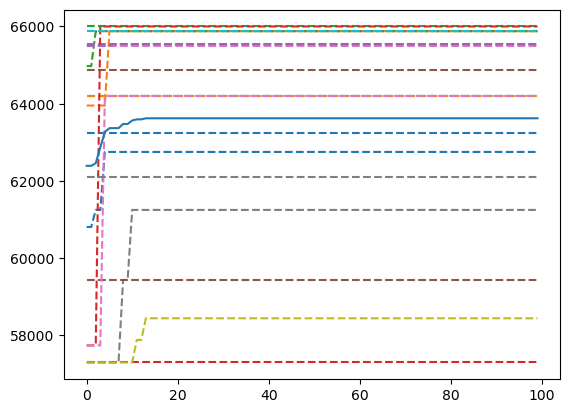

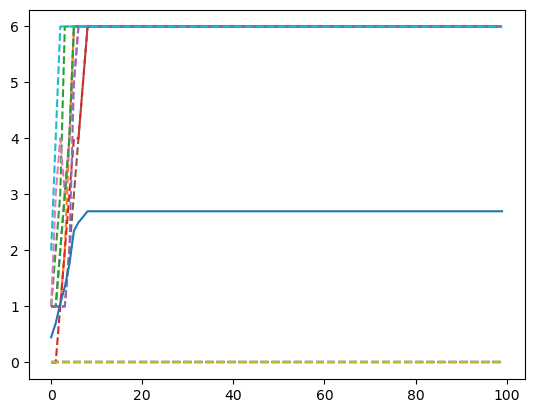

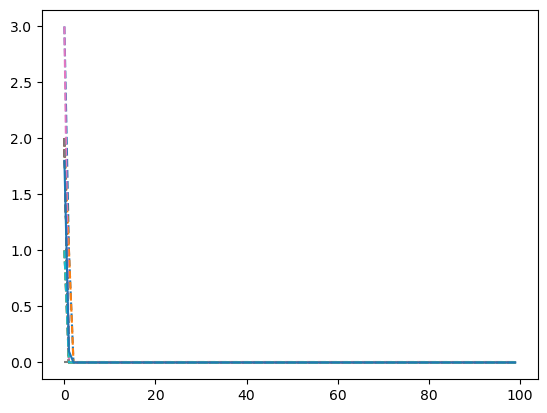

In [7]:
#problem2
import random
from itertools import groupby
import matplotlib.pyplot as plt


def calcFitness(str):
    x = 0
    for i in range(len(str)):
        if(str[i] == '1'):
            x += 2**(5-i)

    return  2*(x**3) - 240*(x**2)  + 7200 *x  +2000
def covertStringtoTen(str):
    x = 0
    for i in range(len(str)):
        if(str[i] == '1'):
            x += 2**(5-i)
    return x 

def getFitnessList(current_generation):
    res = []
    for i in current_generation:
        res.append(calcFitness(i))
    return res

def getRunningTotal(current_generation):
    fitness = getFitnessList(current_generation)
    runningtotal = fitness.copy()

    sum = runningtotal[0]
    for i in range(1,len(runningtotal)):
        sum += runningtotal[i]
        runningtotal[i] = sum
    return runningtotal
    
def chooseNchildren(current_generation, children_amount, mutation_prob):
    def pickparent(current_generation, runningtotal):
        roulette_val = random.random() * runningtotal[len(runningtotal)-1]
        for i in  range(len(runningtotal)):
            if roulette_val <= runningtotal[i]:
                return current_generation[i]
    def cut_parents(parent1, parent2):
        cut_index = random.randint(0, len(parent1)-1)
        if(random.randint(0,1) == 0):
            return parent1[:cut_index] + parent2[cut_index:]
        else:
            return parent2[:cut_index] + parent1[cut_index:]

    children =[]
    runningtotal = getRunningTotal(current_generation)

    while(len(children) < children_amount):
        parent1 = pickparent(current_generation, runningtotal)
        parent2 = pickparent(current_generation, runningtotal)
        children.append(cut_parents(parent1,parent2))
    


    mutated_children = []

    for gene in children:
        if(random.random() <= mutation_prob):
            randindex = random.randint(0, len(gene)-1)
            gene_list = list(gene)
            if gene_list[randindex] == '0':
                gene_list[randindex] = '1'
            else:
                gene_list[randindex] = '0'
            mutated_children.append(str(gene_list))
        else:
            mutated_children.append(gene)

    mutated_children.extend(current_generation)

    mutated_children.sort(key = lambda x: calcFitness(x), reverse = True)
    
    retList = []
    i = 0
    while(len(retList) < children_amount):
        retList.append(mutated_children[i])
        i = i + 1
    
    return retList

def startpoint(popsize):
    res =[]
    while len(res) < popsize:
        str = ""
        for i in range(6):
            if random.randint(0,1) == 0:
                str += "0"
            else:
                str += "1"
        res.append(str)
    res.sort(key = lambda x: calcFitness(x), reverse = True)
    return res


def getavg(list):
    sum = 0
    for i in list:
        sum += calcFitness(i)
    return sum/ len(list)

def getAvgListofList(ListofList): 
    ReturnList = []
    for iteration in range(len(ListofList[0])):
        total = 0
        for trial in range(len(ListofList)):
            total += ListofList[trial][iteration]
        ReturnList.append(total/ len(ListofList))
    return ReturnList
def checkscheme1(str):
    str_list = list(str)
    if(str_list[0] == '0' and str_list[1] == '1'  and str_list[2] == '0' ):
        return True
    else:
        return False
    
def checkscheme2(str):
    str_list = list(str)
    if(str_list[0] == '1' and str_list[1] == '1'):
        return True 
    else:
        return False


def geneticalgo(popsize, iteration, mutationprob, startingGeneration):
    AvgfitnessList = []
    BestfitnessList = []
    scheme1List = []
    scheme2List = []

    current_generation = startingGeneration
    current_best = calcFitness(current_generation[0])

    for i in range(iteration):
        AvgfitnessList.append(getavg(current_generation))
        BestfitnessList.append(current_best)

        scheme1count = 0
        scheme2count = 0
        for i in current_generation:
            if checkscheme1(i):
                scheme1count = scheme1count + 1
            if checkscheme2(i):
                scheme2count = scheme2count + 1
        scheme1List.append(scheme1count)
        scheme2List.append(scheme2count)


        if calcFitness(current_generation[0]) > current_best:
            current_best = calcFitness(current_generation[0])

        current_generation = chooseNchildren(current_generation, popsize, mutationprob)
    
    return (AvgfitnessList, BestfitnessList, scheme1List, scheme2List)



def simpleGeneticSimulation(Trial, popsize, iteration, mutationprob):
    AllAvgfitnessList = []
    AllBestfitnessList = []
    Allscheme1List = []
    Allscheme2List = []

    for i in range(Trial):
        random.seed(i)
        start = startpoint(6)
        tup = geneticalgo(popsize, iteration, mutationprob, start)
        AllAvgfitnessList.append(tup[0])
        AllBestfitnessList.append(tup[1])
        Allscheme1List.append(tup[2])
        Allscheme2List.append(tup[3])

    
    
    for i in AllAvgfitnessList:
        plt.plot(range(0, iteration), i, '--')
    plt.plot(range(0, iteration), getAvgListofList(AllAvgfitnessList))
    plt.show()

    for i in AllBestfitnessList:
        plt.plot(range(0, iteration), i, '--')
    plt.plot(range(0, iteration), getAvgListofList(AllBestfitnessList))
    plt.show()

    for i in Allscheme1List:
        plt.plot(range(0, iteration), i, '--')
    plt.plot(range(0, iteration), getAvgListofList(Allscheme1List))
    plt.show()


    for i in Allscheme2List:
        plt.plot(range(0, iteration), i, '--')
    plt.plot(range(0, iteration), getAvgListofList(Allscheme2List))


    plt.show()




simpleGeneticSimulation(20, 6, 100, 0.5)



In [206]:
#problem 4
import random
from itertools import groupby
import matplotlib.pyplot as plt

def computeString(list):
    def find(key):
        for i in range(len(list)):
            if(list[i] == key):
                return i
    def calcXY(i):
        
        return (((i)%4), (i)//4)
    def calcWeight(t1,t2):
        return abs(t2[0]-t1[0]) + abs(t2[1]-t1[1])
    cur =[]
    weight = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    cur.append(calcWeight(calcXY(find("g")), calcXY(find("a"))))
    cur.append(calcWeight(calcXY(find("a")), calcXY(find("b"))))
    cur.append(calcWeight(calcXY(find("b")), calcXY(find("c"))))
    cur.append(calcWeight(calcXY(find("c")), calcXY(find("i"))))
    cur.append(calcWeight(calcXY(find("i")), calcXY(find("d"))))
    cur.append(calcWeight(calcXY(find("d")), calcXY(find("e"))))
    cur.append(calcWeight(calcXY(find("e")), calcXY(find("f"))))
    cur.append(calcWeight(calcXY(find("g")), calcXY(find("h"))))
    cur.append(calcWeight(calcXY(find("h")), calcXY(find("c"))))
    cur.append(calcWeight(calcXY(find("h")), calcXY(find("i"))))
    cur.append(calcWeight(calcXY(find("g")), calcXY(find("j"))))
    cur.append(calcWeight(calcXY(find("j")), calcXY(find("k"))))
    cur.append(calcWeight(calcXY(find("i")), calcXY(find("l"))))
    cur.append(calcWeight(calcXY(find("k")), calcXY(find("l"))))
    cur.append(calcWeight(calcXY(find("l")), calcXY(find("e"))))
    sum = 0
    for i in range(len(cur)):
        sum+= cur[i] * weight[i]
    return sum


def computeFitness(list):
    def find(key):
        for i in range(len(list)):
            if(list[i] == key):
                return i
    def calcXY(i):
        
        return (((i)%4), (i)//4)
    def calcWeight(t1,t2):
        return abs(t2[0]-t1[0]) + abs(t2[1]-t1[1])
    cur =[]
    weight = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    cur.append(calcWeight(calcXY(find("g")), calcXY(find("a"))))
    cur.append(calcWeight(calcXY(find("a")), calcXY(find("b"))))
    cur.append(calcWeight(calcXY(find("b")), calcXY(find("c"))))
    cur.append(calcWeight(calcXY(find("c")), calcXY(find("i"))))
    cur.append(calcWeight(calcXY(find("i")), calcXY(find("d"))))
    cur.append(calcWeight(calcXY(find("d")), calcXY(find("e"))))
    cur.append(calcWeight(calcXY(find("e")), calcXY(find("f"))))
    cur.append(calcWeight(calcXY(find("g")), calcXY(find("h"))))
    cur.append(calcWeight(calcXY(find("h")), calcXY(find("c"))))
    cur.append(calcWeight(calcXY(find("h")), calcXY(find("i"))))
    cur.append(calcWeight(calcXY(find("g")), calcXY(find("j"))))
    cur.append(calcWeight(calcXY(find("j")), calcXY(find("k"))))
    cur.append(calcWeight(calcXY(find("i")), calcXY(find("l"))))
    cur.append(calcWeight(calcXY(find("k")), calcXY(find("l"))))
    cur.append(calcWeight(calcXY(find("l")), calcXY(find("e"))))
    sum = 0
    for i in range(len(cur)):
        sum+= cur[i] * weight[i]
    return 1/sum

def startpoint(length):
    str = "ijlcgakbfdeh"
    str_list = list(str)
    res = []
    while len(res) < length:
        new_list = str_list.copy()
        random.shuffle(new_list)
        str1 =""
        res.append(str1.join(new_list))

    res.sort(key = lambda x: computeFitness(x), reverse = True)
    return res
def getAvgListofList(ListofList): 
    ReturnList = []
    for iteration in range(len(ListofList[0])):
        total = 0
        for trial in range(len(ListofList)):
            total += ListofList[trial][iteration]
        ReturnList.append(total/ len(ListofList))
    return ReturnList

def mutateswap(listString, mutationprob):
    for index in range(len(listString)):
        if(random.random() < mutationprob):
            key = listString[index]
            str_list = list(key)
            index1 = random.randint(0, len(key)-1)
            index2 = random.randint(0, len(key)-1)
            while(index1 == index2):
                index2 = random.randint(0, len(key)-1)
            
            temp = str_list[index1]
            str_list[index1] = str_list[index2]
            str_list[index2] = temp
            str1 =""
            listString[index] = str1.join(str_list)


def cutParentPMX(parent1, parent2):
    def tailContains(key, tail):
        for i in tail:
            if key == i:
                return True 
        return False
    parent1_list = list(parent1)
    parent2_list = list(parent2)
    map_parent1_to_parent2 = dict()
    map_parent2_to_parent1 = dict()
    for i in range(len(parent1_list)):
        map_parent1_to_parent2.update({parent1_list[i]: parent2_list[i]})
        map_parent2_to_parent1.update({parent2_list[i]: parent1_list[i]})
    
    if random.randint(0,1) == 0:
        cutindex = random.randint(0, len(parent1) -1)
        childrentail = parent2_list[cutindex:]
        childrenhead = parent1_list[:cutindex]
        for i in range(len(childrenhead)):
            key = childrenhead[i]
            while tailContains(key, childrentail):
                key = map_parent2_to_parent1.get(key)
            
            childrenhead[i] = key
    
        childrenhead.extend(childrentail)
        str = ""
        return str.join(childrenhead)
    else:
        cutindex = random.randint(0, len(parent1) -1)
        childrentail = parent1_list[cutindex:]
        childrenhead = parent2_list[:cutindex]
        for i in range(len(childrenhead)):
            key = childrenhead[i]
            while tailContains(key, childrentail):
                key = map_parent1_to_parent2.get(key)
            
            childrenhead[i] = key
    
        childrenhead.extend(childrentail)
        str = ""
        return str.join(childrenhead)
def cutParentOrder(parent1, parent2): 
    def getlocation(key, List):
        for i in range(len(List)):
            if List[i] == key:
                return i
            
    cutindex = random.randint(0, len(parent1) -1)
    parent1_list = list(parent1)
    parent2_list = list(parent2)

    if(random.randint(0,1) == 0):
        childrenhead = parent1_list[:cutindex]
        childrentail = parent1_list[cutindex:]
        childrentail.sort(key = lambda x: getlocation(x, parent2_list), reverse = False)
        
        childrenhead.extend(childrentail)
        str1 = ""
        return str1.join(childrenhead)
    else:
        childrenhead = parent2_list[:cutindex]
        childrentail = parent2_list[cutindex:]
        childrentail.sort(key = lambda x: getlocation(x, parent1_list), reverse = False)
        
        childrenhead.extend(childrentail)
        str1 = ""
        return str1.join(childrenhead)

def cutParentCycle(parent1, parent2): 
    def containsNothingAt(tail):
        for i in range(len(tail)):
            if "" == tail[i]:
                return i
        return -1
    def getLocation(key, List):
        for i in range(len(List)):
            if key == List[i]:
                return i
    parent1_list = list(parent1)
    parent2_list = list(parent2)
    map_parent1_to_parent2 = dict()
    map_parent2_to_parent1 = dict()
    children_list =[]
    for i in range(len(parent1_list)):
        children_list.append("")
        map_parent1_to_parent2.update({parent1_list[i]: parent2_list[i]})
        map_parent2_to_parent1.update({parent2_list[i]: parent1_list[i]})
    if(random.randint(0,1) == 0):
        toggle = True
    else:
        toggle = False

    while True:
        if containsNothingAt(children_list) == -1:
            return children_list
        else:
            if toggle:
                index = containsNothingAt(children_list)
                start_key = parent1_list[index]
                key = parent1_list[index]
                children_list[index] = key
            
                while start_key != map_parent2_to_parent1.get(key):
                    index = getLocation(key, parent2_list)
                    key = parent1_list[index]
                    children_list[index] = key
                toggle = not toggle
            else:
                index = containsNothingAt(children_list)
                start_key = parent2_list[index]
                key = parent2_list[index]
                children_list[index] = key
            
                while start_key != map_parent1_to_parent2.get(key):
                    index = getLocation(key, parent1_list)
                    key = parent2_list[index]
                    children_list[index] = key
                    
                toggle = not toggle
    
    


def pickChildrenRoulette(current_generation, popsize, cutParents, crossprob):
    def pickparent(current_generation, runningtotal):
        roulette_val = random.random() * runningtotal[len(runningtotal)-1]
        for i in  range(len(runningtotal)):
            if roulette_val <= runningtotal[i]:
                return current_generation[i]
    def getFitnessList(current_generation):
        res = []
        for i in current_generation:
            res.append(computeFitness(i))
        return res
    def getRunningTotal(current_generation):
        fitness = getFitnessList(current_generation)
        runningtotal = fitness.copy()
        sum = runningtotal[0]
        for i in range(1,len(runningtotal)):
            sum += runningtotal[i]
            runningtotal[i] = sum
        return runningtotal
    Children =[]
    runningtotal = getRunningTotal(current_generation)
    while(len(Children) < popsize):
        if random.random() < crossprob:
            parent1 = pickparent(current_generation, runningtotal)
            parent2 = pickparent(current_generation, runningtotal)
            Children.append(cutParents(parent1,parent2))
    return Children
def pickChildrenTournament(current_generation, popsize, cutParents, crossprob):
    Children = []
    subgroup = 5
    CurrentGen = current_generation.copy()

    while len(Children) < popsize:
        random.shuffle(CurrentGen)
        groups = [CurrentGen[x:x+subgroup] for x in range(0, len(CurrentGen), subgroup)]
        for group in groups:
            group.sort(key = lambda x: computeFitness(x), reverse = True)
        if random.random() < crossprob:
            parent1 = groups[0][0]
            parent2 = groups[1][0]
            Children.append(cutParents(parent1,parent2))
        
    return Children

def chooseNchildren(current_generation, popsize, mutationprob, crossprob, cutParents, mutateList, pickChildren):
    Children = pickChildren(current_generation, popsize, cutParents, crossprob)
    Children.extend(current_generation)
    mutateList(Children, mutationprob)
    Children.sort(key = lambda x: computeFitness(x), reverse = True)
    Retlist = []
    i = 0
    while(len(Retlist) < popsize):
        Retlist.append(Children[i])
        i = i + 1
    return Retlist


def geneticalgo4(popsize, iteration, mutationprob, crossprob,  startingGeneration, chooseNchildren, cutParents, mutateList, PickChildren):
    def getavgString(list):
        sum  = 0
        for i in list:
            sum+= computeString(i)
        return sum/len(list)
    AvgfitnessList = []
    BestfitnessList = []
    current_generation = startingGeneration
    current_best = computeString(current_generation[0])
    for i in range(iteration):
        AvgfitnessList.append(getavgString(current_generation))
        BestfitnessList.append(current_best)
        if computeString(current_generation[0]) < current_best:
            current_best = computeString(current_generation[0])
        current_generation = chooseNchildren(current_generation, popsize, mutationprob, crossprob, cutParents, mutateList, PickChildren)
    
    return (AvgfitnessList, BestfitnessList)

def simpleGeneticSimulation(Trial, popsize, iteration, mutationprob, crossprob, chooseNchildren, cutParents, mutateList, PickChildren):
    AllAvgfitnessList = []
    AllBestfitnessList = []
    for i in range(Trial):
        random.seed(i)
        start = startpoint(popsize)
        tup = geneticalgo4(popsize, iteration, mutationprob, crossprob, start, chooseNchildren, cutParents, mutateList, PickChildren)
        AllAvgfitnessList.append(tup[0])
        AllBestfitnessList.append(tup[1])
    for i in AllAvgfitnessList:
        plt.plot(range(0, iteration), i, '--')
    plt.plot(range(0, iteration), getAvgListofList(AllAvgfitnessList))
    plt.show()
    for i in AllBestfitnessList:
        plt.plot(range(0, iteration), i, '--')
    plt.plot(range(0, iteration), getAvgListofList(AllBestfitnessList))
    plt.show()


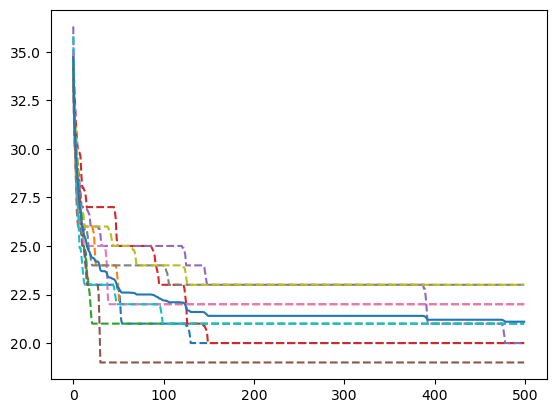

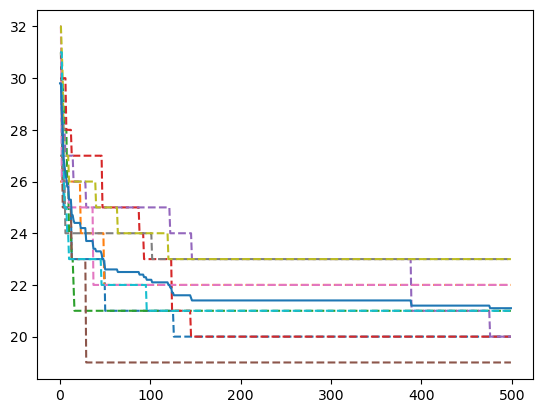

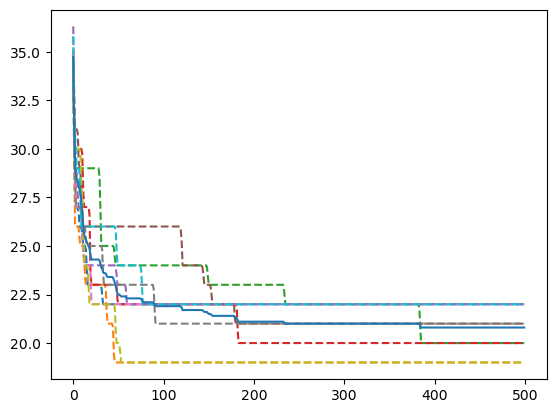

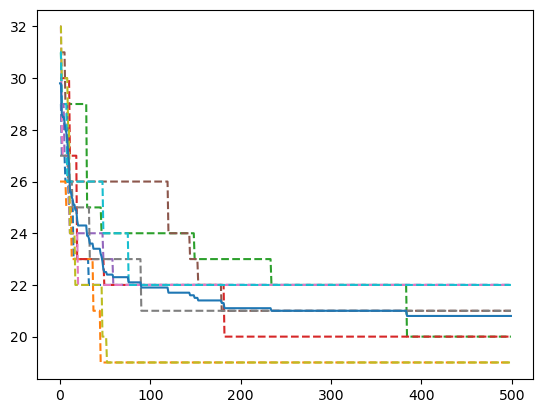

In [212]:
simpleGeneticSimulation(10, 10, 500, 0.05, .9, chooseNchildren, cutParentPMX, mutateswap,pickChildrenRoulette )
simpleGeneticSimulation(10, 10, 500, 0.05, .9, chooseNchildren, cutParentPMX, mutateswap,pickChildrenTournament )

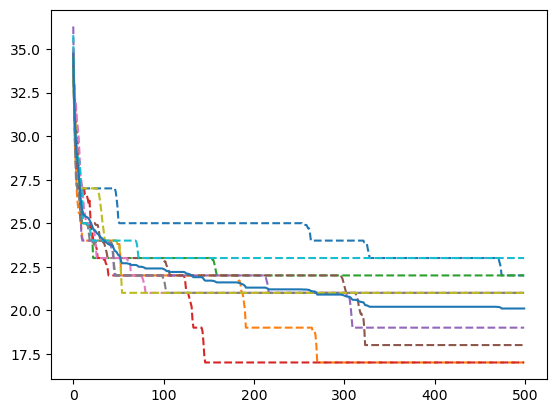

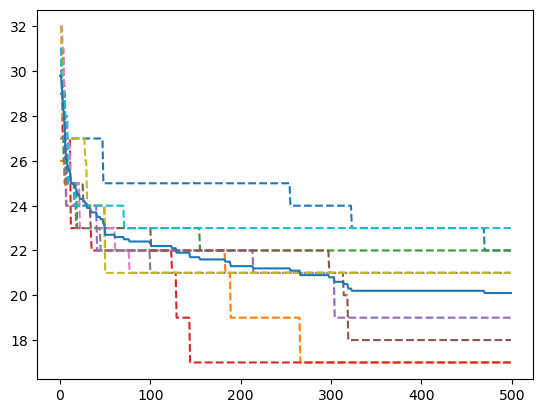

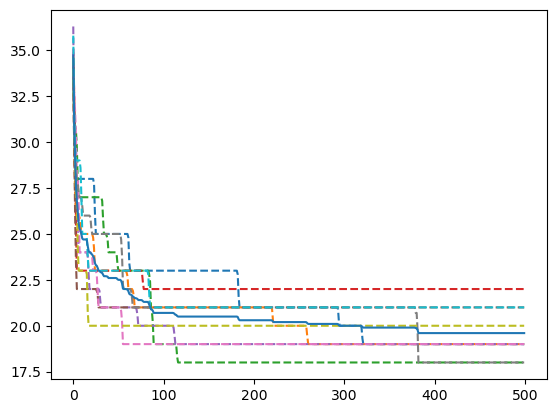

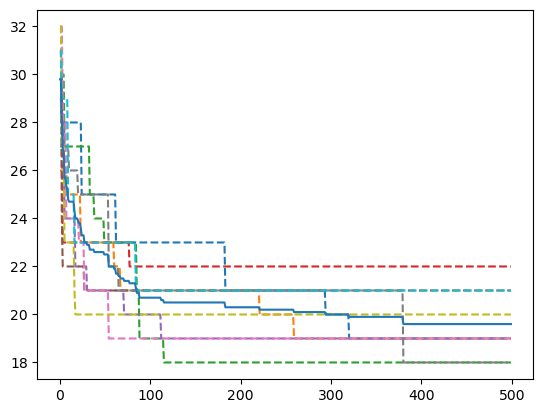

In [213]:
simpleGeneticSimulation(10, 10, 500, 0.05, .9, chooseNchildren, cutParentOrder, mutateswap, pickChildrenRoulette)
simpleGeneticSimulation(10, 10, 500, 0.05, .9, chooseNchildren, cutParentOrder, mutateswap, pickChildrenTournament)

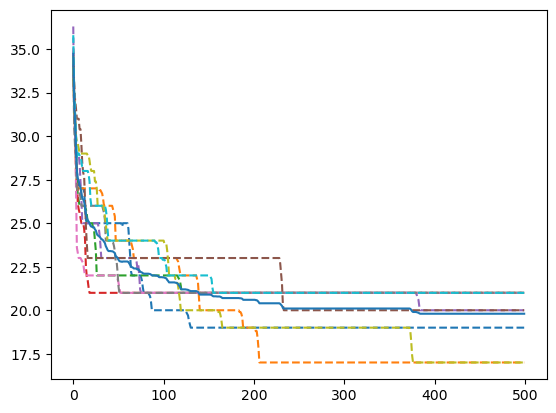

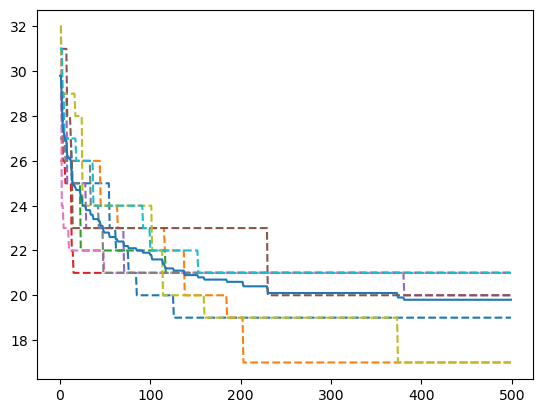

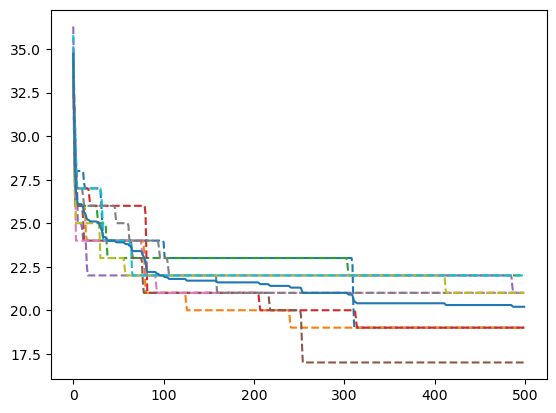

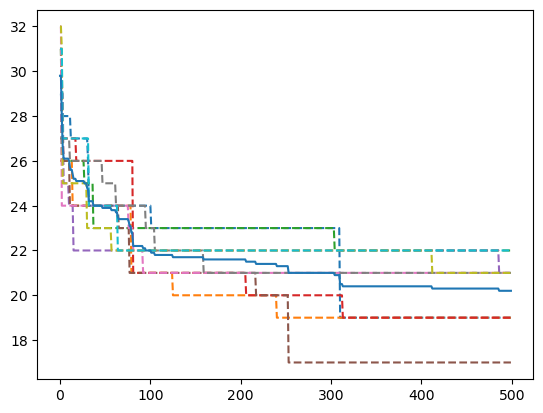

In [214]:
simpleGeneticSimulation(10, 10, 500, 0.05, .9, chooseNchildren, cutParentCycle, mutateswap, pickChildrenRoulette)
simpleGeneticSimulation(10, 10, 500, 0.05, .9, chooseNchildren, cutParentCycle, mutateswap, pickChildrenTournament)
